Name: Aparna Iyer

PRN: 22070126017

Branch: AI-ML A1

Batch: 2022-2026

###**Title: Harris Corner Detection in Computer Vision**

**Aim:**
To implement the Harris Corner Detection algorithm and identify significant corner points in an image, which can be used in various applications such as object recognition, tracking, and matching.

**Objectives:**

1. To understand the concept of corner detection in image processing.
2. To implement the Harris Corner Detection algorithm and detect corners in an image.
3. To explore how the algorithm uses image gradients and the autocorrelation matrix to identify corners.
4. To evaluate the performance of the Harris Corner Detection method in detecting robust keypoints in images.
To compare the detected corners with other methods for feature detection.

**Theory:**

The Harris Corner Detection algorithm is a widely used method for detecting corners in an image. Corners are points where there is significant variation in image intensity in all directions, making them useful for applications such as image matching, tracking, and object recognition.

**Image Gradients:**

The Harris Corner Detection algorithm relies on calculating the gradients of the image, which measure the intensity changes in the x and y directions. These gradients are used to understand how the pixel values change around a point.
Structure Tensor (Autocorrelation Matrix):

The algorithm computes a matrix M at each pixel to capture the local structure of the image. This matrix is called the structure tensor and is derived from the image gradients as follows:

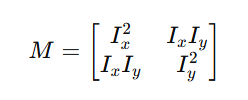

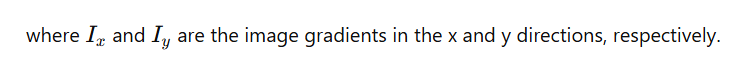

Corner Response Function (R):

The Harris Corner Detection uses a response function to detect corners. The response function R is calculated as:

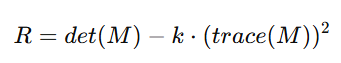

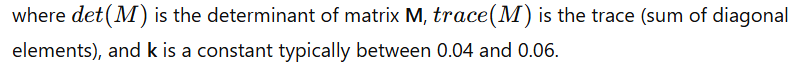

det(M) represents the local image structure's variation, while trace(M) captures the smoothness of the image. A high value of R indicates a corner.

**Thresholding and Non-Maximum Suppression:**

Once the response function is computed, a threshold is applied to identify potential corner points. Non-maximum suppression is then used to refine the corner points by eliminating non-local maxima.


In [ ]:
#Import necessary libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image_path, k=0.04, threshold=0.4):
    # Step 1: Load Image and Convert to Grayscale
    image = cv2.imread(image_path)
    original_image = image.copy()  # Keep a copy for original display
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)  # Convert to float for precision

    # Step 2: Compute gradients using Sobel Operator
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Step 3: Compute Structure Tensor Components
    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    # Step 4: Apply Gaussian Filter for Smoothing
    Ixx = cv2.GaussianBlur(Ixx, (3, 3), 1)
    Iyy = cv2.GaussianBlur(Iyy, (3, 3), 1)
    Ixy = cv2.GaussianBlur(Ixy, (3, 3), 1)

    # Step 5: Compute Harris Response Function
    det_M = (Ixx * Iyy) - (Ixy ** 2)
    trace_M = Ixx + Iyy
    R = det_M - k * (trace_M ** 2)

    # Step 6: Normalize and Threshold R to identify corners
    R_norm = cv2.normalize(R, None, 0, 1, cv2.NORM_MINMAX)
    corner_mask = (R_norm > threshold)  # Thresholding
    corners = np.argwhere(corner_mask)

    # Step 7: Mark Corners on Original Image
    for y, x in corners:
        cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

    # Step 8: Display the result
    plt.figure(figsize=(15, 5))

    # Show Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Show Image with Detected Corners
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Harris Corner Detection")
    plt.axis("off")

    # Show Harris Response Map
    plt.subplot(1, 3, 3)
    plt.imshow(R_norm, cmap="gray")
    plt.title("Harris Response Map")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


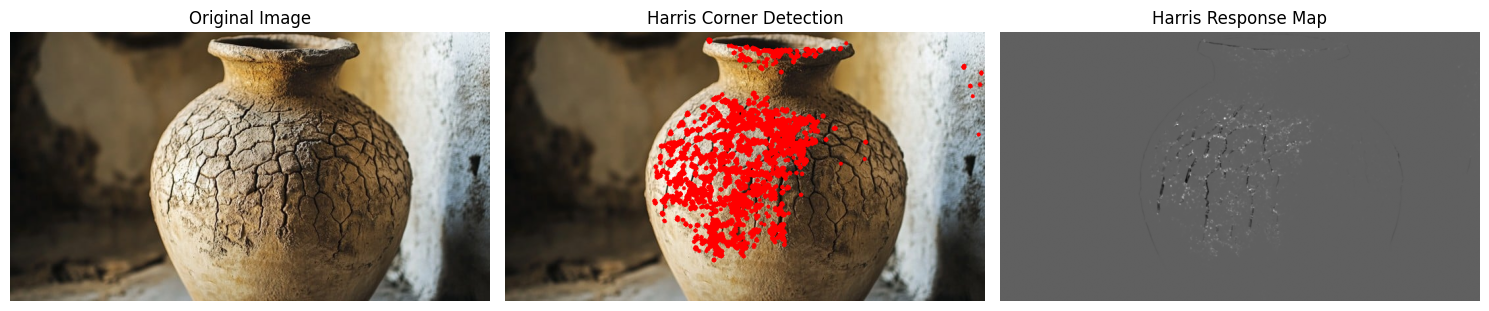

In [ ]:

image_path = "/content/CrackedVase.jpg"
harris_corner_detection(image_path)

**Conclusion:**

The Harris Corner Detection algorithm is an effective method for identifying distinctive corner points in an image. These points are valuable in a variety of computer vision applications, including object recognition, image matching, tracking, and 3D reconstruction.

Applications of Harris Corner Detection include:

1. Feature Matching: In panorama stitching, Harris corners help match overlapping features between images, enabling seamless image alignment.
2. Tracking: In augmented reality or object tracking, Harris corners track key points in video sequences, ensuring accurate alignment of virtual objects, such as tracking a moving car in a simulation.
3. Object Recognition: In face recognition, Harris corners identify distinct facial features (eyes, nose, mouth), enabling robust recognition under different orientations.
4. Structure from Motion (SfM): In 3D reconstruction, Harris corners establish correspondences between images, useful in drone mapping or robot navigation to create 3D models.
5. Image Alignment: In medical imaging, Harris corners assist in aligning images, such as matching pre- and post-surgery scans for comparison.